In [ ]:
# Standard library
import logging

# Third-party libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np

# Configure matplotlib for Jupyter
%matplotlib inline
plt.style.use('default')

# Geospatial libraries
import folium
from folium.plugins import MarkerCluster

# Local application
from run_etl_pipeline import create_db_engine, setup_logging
from config import DB_CONFIG

# Setup
setup_logging()
engine = create_db_engine(DB_CONFIG)

2025-09-19 10:14:49,948 - INFO - Successfully connected to the PostgreSQL database.


In [27]:
if engine:
    logging.info("Database engine created successfully.")
    listings = pd.read_sql_table('listings', engine)
    calendar = pd.read_sql_table('calendar', engine)
    logging.info("Data read successfully from database.")
else:
    logging.error("Failed to create database engine.")

2025-09-19 10:14:49,957 - INFO - Database engine created successfully.
2025-09-19 10:14:55,600 - INFO - Data read successfully from database.


In [28]:
dfs = {
    'listings': listings,        
    'calendar': calendar
}

In [29]:
for name, df in dfs.items():
    print(f"{name.upper()}:")
    display(df.head())

LISTINGS:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,37380,https://www.airbnb.com/rooms/37380,20250804133915,2025-08-04,city scrape,Handy to Brisbane Airport,None,Wavell Heights is an older well established ne...,https://a0.muscache.com/pictures/airflow/Hosti...,161432,...,5.00,4.94,4.93,NaN,f,2,2,0,0,0.47
1,325029,https://www.airbnb.com/rooms/325029,20250804133915,2025-08-04,city scrape,Sunny Home - 2 Bed & Deck,Welcome to our cozy Sunny Home on a quiet West...,West End's renowned Boundary St is Brisbane's ...,https://a0.muscache.com/pictures/prohost-api/H...,1564865,...,4.95,4.91,4.81,NaN,f,2,2,0,0,1.78
2,458131,https://www.airbnb.com/rooms/458131,20250804133915,2025-08-04,previous scrape,Cat lovers needed! 2 bedroom house with cat!,"You will be sharing with our friendly, easy-c...",None,https://a0.muscache.com/pictures/6167586/ead8f...,654019,...,5.00,4.50,5.00,NaN,t,1,1,0,0,0.01
3,468726,https://www.airbnb.com/rooms/468726,20250804133915,2025-08-04,city scrape,"Near the city By the river Close to UQ, Milton",Our large air-con fully equipped two-bedroom a...,Guests at our Suncorp Stadium accommodation en...,https://a0.muscache.com/pictures/7ddb701c-a88b...,2318421,...,4.76,4.76,4.52,NaN,f,5,5,0,0,0.15
4,469007,https://www.airbnb.com/rooms/469007,20250804133915,2025-08-04,city scrape,Nice Room in Large Homely Residence,None,None,https://a0.muscache.com/pictures/7102919/034d3...,2328120,...,4.98,4.76,4.80,NaN,f,1,0,1,0,0.35


CALENDAR:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,18467766,2025-08-04,f,NaN,NaN,3,1125
1,18467766,2025-08-05,f,NaN,NaN,3,1125
2,18467766,2025-08-06,f,NaN,NaN,3,1125
3,18467766,2025-08-07,f,NaN,NaN,3,1125
4,18467766,2025-08-08,f,NaN,NaN,3,1125


In [30]:
for name, df in dfs.items():
    print(f"{name.upper()}")
    print('=' * 60)
    df.info()

LISTINGS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5774 entries, 0 to 5773
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5774 non-null   int64  
 1   listing_url                                   5774 non-null   object 
 2   scrape_id                                     5774 non-null   int64  
 3   last_scraped                                  5774 non-null   object 
 4   source                                        5774 non-null   object 
 5   name                                          5774 non-null   object 
 6   description                                   5709 non-null   object 
 7   neighborhood_overview                         2829 non-null   object 
 8   picture_url                                   5774 non-null   object 
 9   host_id                                       5774 non

In [31]:
for name, df in dfs.items():
    print(f"\n{name.upper()} - DataFrame Description")
    desc = df.describe().round(2)
    display(desc)


LISTINGS - DataFrame Description


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.774000e+03,5.774000e+03,5.774000e+03,5771.00,5771.00,0.0,5774.00,5774.00,5774.00,5145.00,...,5134.00,5134.00,5134.00,5134.00,0.0,5774.00,5774.00,5774.00,5774.00,5135.00
mean,8.599926e+17,2.025080e+13,2.166658e+08,53.03,75.53,NaN,-27.48,153.04,3.65,1.41,...,4.78,4.84,4.81,4.67,NaN,29.80,28.13,1.66,0.00,1.94
std,5.433041e+17,0.000000e+00,2.093437e+08,133.09,173.05,NaN,0.06,0.06,2.30,0.71,...,0.33,0.30,0.28,0.38,NaN,67.53,67.94,5.25,0.07,1.74
min,3.738000e+04,2.025080e+13,3.116500e+04,1.00,1.00,NaN,-27.66,152.74,1.00,0.00,...,1.00,1.00,1.00,1.00,NaN,1.00,0.00,0.00,0.00,0.01
25%,5.411321e+07,2.025080e+13,4.346814e+07,1.00,2.00,NaN,-27.49,153.02,2.00,1.00,...,4.70,4.80,4.75,4.58,NaN,1.00,1.00,0.00,0.00,0.67
50%,1.054269e+18,2.025080e+13,1.229527e+08,4.00,6.00,NaN,-27.47,153.03,3.00,1.00,...,4.88,4.93,4.88,4.76,NaN,4.00,2.00,0.00,0.00,1.46
75%,1.314117e+18,2.025080e+13,4.011465e+08,29.00,39.00,NaN,-27.46,153.05,4.00,2.00,...,5.00,5.00,4.97,4.90,NaN,18.00,13.00,1.00,0.00,2.79
max,1.479673e+18,2.025080e+13,7.105074e+08,869.00,901.00,NaN,-27.07,153.42,16.00,9.00,...,5.00,5.00,5.00,5.00,NaN,293.00,293.00,40.00,2.00,14.17



CALENDAR - DataFrame Description


,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,2.107510e+06,0.0,0.0,2107510.00,2.107510e+06
mean,8.599926e+17,NaN,NaN,4.90,2.232071e+06
std,5.432572e+17,NaN,NaN,15.19,6.918968e+07
min,3.738000e+04,NaN,NaN,1.00,1.000000e+00
25%,5.411292e+07,NaN,NaN,1.00,1.200000e+02
50%,1.054269e+18,NaN,NaN,2.00,3.650000e+02
75%,1.314118e+18,NaN,NaN,4.00,1.125000e+03
max,1.479673e+18,NaN,NaN,500.00,2.147484e+09


,neighbourhood_cleansed,property_type,room_type,total_listings,avg_nightly_price,occupancy_rate_pct,avg_daily_revenue,estimated_monthly_revenue,revenue_rank
0,Newstead - Bowen Hills,Entire serviced apartment,Entire home/apt,5,2497.60,22.03,550.16,16504.8,1
1,Hendra,Entire home,Entire home/apt,5,1061.20,34.85,369.82,11094.6,2
2,Brookfield - Kenmore Hills,Entire home,Entire home/apt,7,774.14,45.28,350.56,10516.8,3
3,Ascot,Entire home,Entire home/apt,10,475.90,63.40,301.71,9051.3,4
4,New Farm,Entire home,Entire home/apt,20,524.00,55.86,292.72,8781.6,5
5,Balmoral,Entire home,Entire home/apt,5,345.60,83.56,288.79,8663.7,6
6,Murarrie,Entire home,Entire home/apt,5,459.40,61.81,283.95,8518.5,7
7,Hawthorne,Entire home,Entire home/apt,10,491.70,57.62,283.30,8499.0,8
8,Carina,Entire home,Entire home/apt,6,359.00,78.81,282.94,8488.2,9
9,Morningside - Seven Hills,Entire home,Entire home/apt,9,436.44,62.71,273.69,8210.7,10


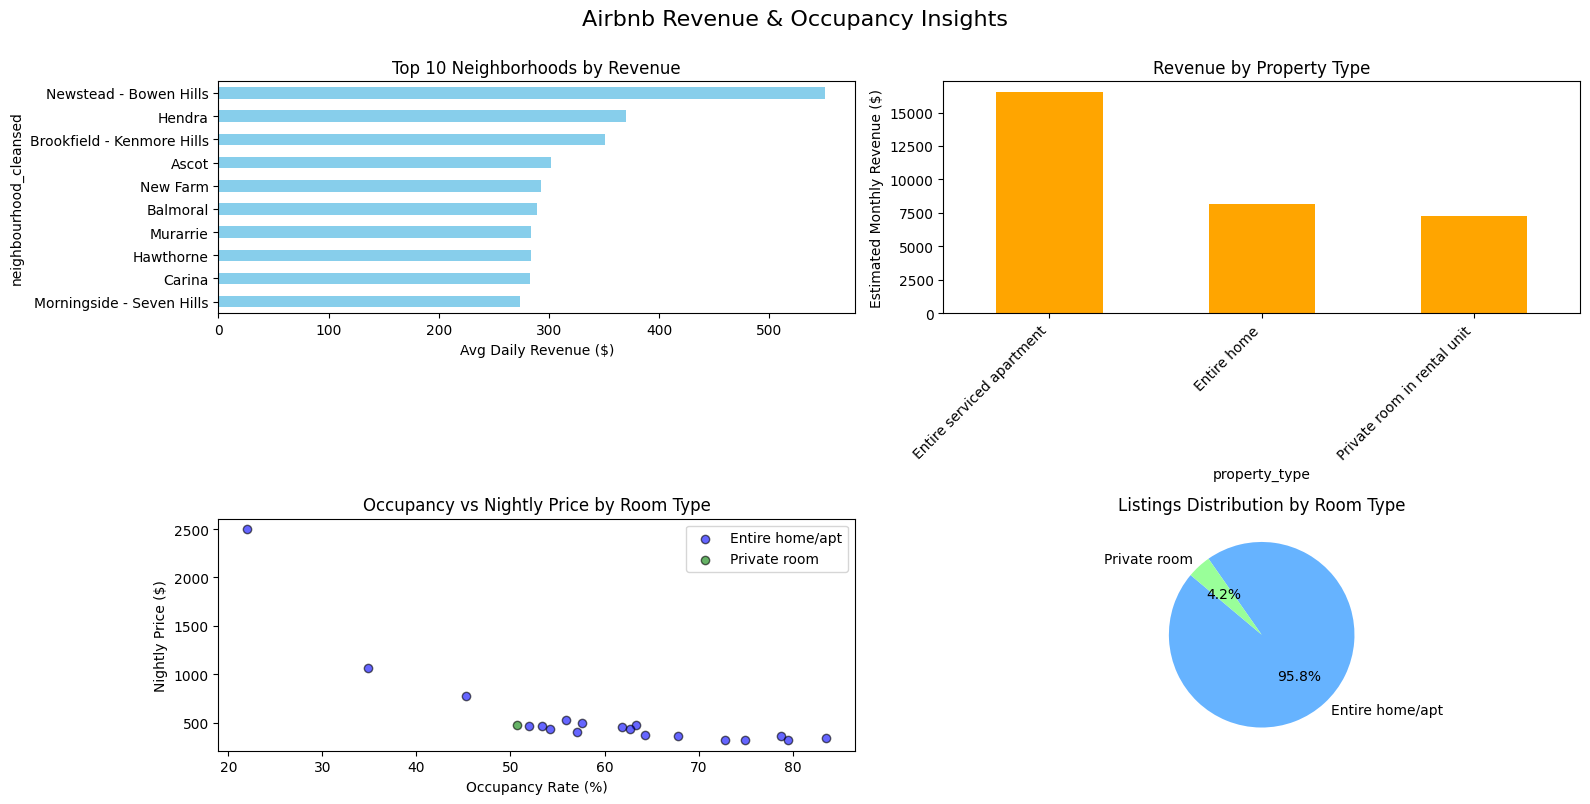

In [32]:
#1. Which neighborhoods and property types generate the highest revenue per listing, and how should Airbnb allocate marketing resources?
query = (
    """
    WITH revenue_metrics AS (
        SELECT
            l.neighbourhood_cleansed,
            l.property_type,
            l.room_type,
            COUNT(DISTINCT l.id) AS total_listings,
            AVG(l.price) AS avg_nightly_price,
            COUNT(CASE WHEN c.available = 'f' THEN 1 END) AS booked_nights,
            COUNT(*) AS total_nights,
            ROUND(
                AVG(l.price)::NUMERIC * 
                (COUNT(CASE WHEN c.available = 'f' THEN 1 END)::NUMERIC / COUNT(*)::NUMERIC), 
                2
            ) AS avg_daily_revenue
        FROM listings AS l
        INNER JOIN calendar AS c
            ON c.listing_id = l.id
        WHERE l.price IS NOT NULL
        GROUP BY
            l.neighbourhood_cleansed,
            l.property_type,
            l.room_type
        HAVING COUNT(DISTINCT l.id) >= 5
    ),
    ranked_performance AS (
        SELECT
            *,
            DENSE_RANK() OVER (ORDER BY avg_daily_revenue DESC) AS revenue_rank,
            avg_daily_revenue * 30 AS estimated_monthly_revenue
        FROM revenue_metrics
    )
    SELECT
        neighbourhood_cleansed,
        property_type,
        room_type,
        total_listings,
        ROUND(avg_nightly_price::NUMERIC, 2) AS avg_nightly_price,
        ROUND(booked_nights::DECIMAL / total_nights * 100, 2) AS occupancy_rate_pct,
        avg_daily_revenue,
        estimated_monthly_revenue,
        revenue_rank
    FROM ranked_performance
    WHERE revenue_rank <= 20
    ORDER BY revenue_rank;
    """
)
# read data from SQL
df = pd.read_sql(query, engine)
display(df)

# set up figure and title
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Airbnb Revenue & Occupancy Insights', fontsize=16, y=1)

# chart 1: top neighborhoods by avg daily revenue
df.groupby('neighbourhood_cleansed')['avg_daily_revenue'].mean().sort_values(ascending=False).head(10).plot(
    kind='barh', ax=axes[0, 0], color='skyblue', title='Top 10 Neighborhoods by Revenue', xlabel='Avg Daily Revenue ($)'
)
axes[0, 0].invert_yaxis()

# chart 2: revenue by property type
df.groupby('property_type')['estimated_monthly_revenue'].mean().sort_values(ascending=False).head(8).plot(
    kind='bar', ax=axes[0, 1], color='orange', title='Revenue by Property Type', ylabel='Estimated Monthly Revenue ($)'
)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# chart 3: occupancy vs nightly price by room type
colors = {'Entire home/apt': 'blue', 'Private room': 'green', 'Shared room': 'red'}
for room in df['room_type'].unique():
    subset = df[df['room_type'] == room]
    axes[1, 0].scatter(subset['occupancy_rate_pct'], subset['avg_nightly_price'], label=room, alpha=0.6, color=colors.get(room, 'gray'), edgecolor='k')
axes[1, 0].set_title('Occupancy vs Nightly Price by Room Type')
axes[1, 0].set_xlabel('Occupancy Rate (%)')
axes[1, 0].set_ylabel('Nightly Price ($)')
axes[1, 0].legend()

# chart 4: listings distribution by room type
df.groupby('room_type')['total_listings'].sum().plot(
    kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'], title='Listings Distribution by Room Type'
)
axes[1, 1].set_ylabel('')

# show plots
plt.tight_layout()
plt.show()

,month,year,room_type,bookings,total_availability,booking_rate_pct,avg_price
0,8.0,2025.0,Entire home/apt,65301,109312,59.74,277.03
1,8.0,2025.0,Hotel room,43,168,25.60,332.83
2,8.0,2025.0,Private room,16485,34608,47.63,129.30
3,8.0,2025.0,Shared room,70,168,41.67,88.17
4,9.0,2025.0,Entire home/apt,41443,117120,35.39,277.03
5,9.0,2025.0,Hotel room,37,180,20.56,332.83
6,9.0,2025.0,Private room,10293,37080,27.76,129.30
7,9.0,2025.0,Shared room,77,180,42.78,88.17
8,10.0,2025.0,Entire home/apt,35467,121024,29.31,277.03
9,10.0,2025.0,Hotel room,22,186,11.83,332.83


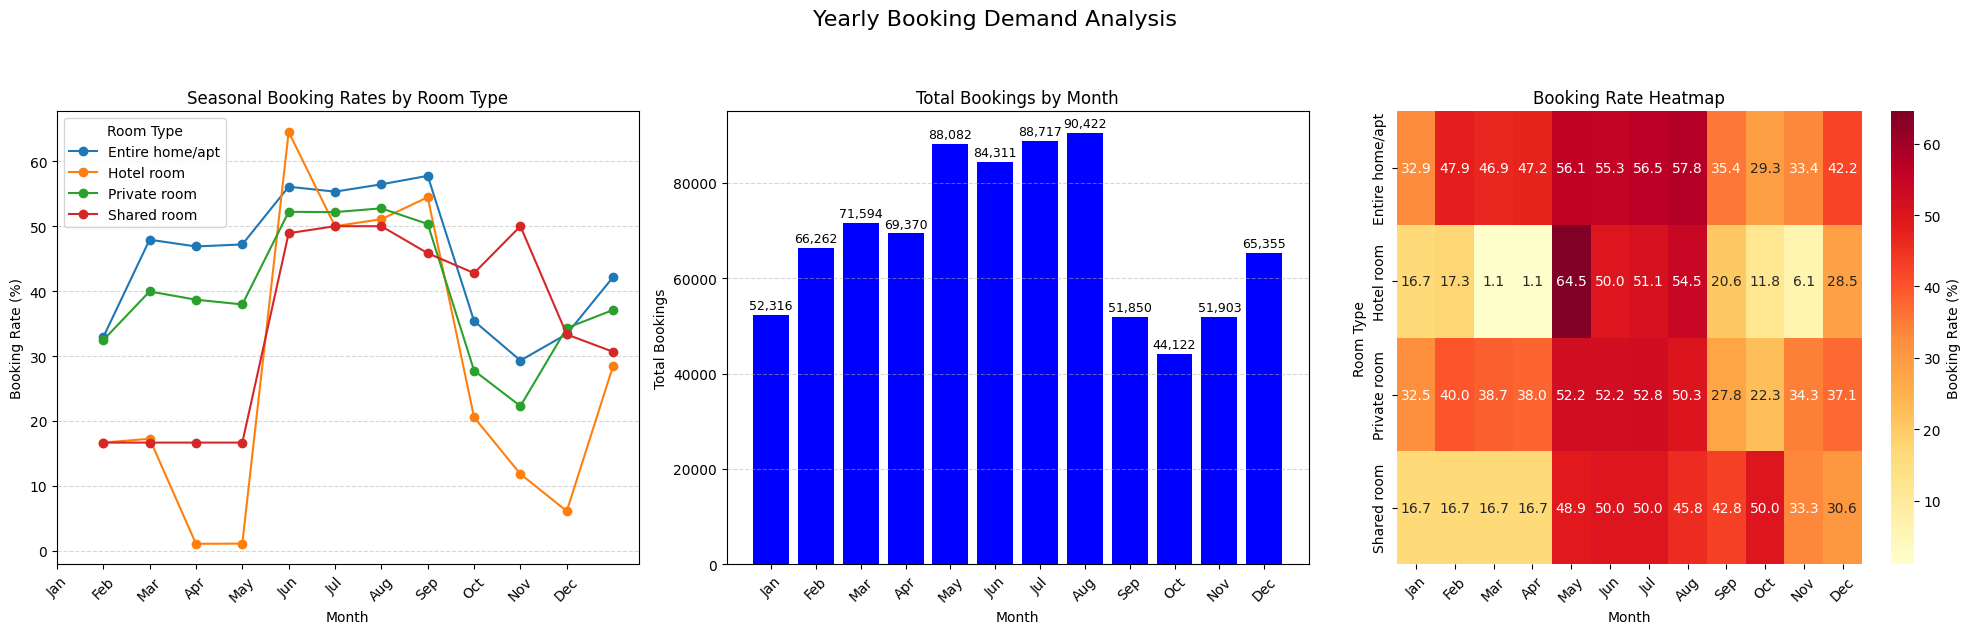

In [33]:
#2. How does booking demand fluctuate throughout the year, and when should hosts adjust their pricing and availability strategies?
import calendar
query = (
    """
    SELECT
        EXTRACT(month FROM c.date::date) AS month,
        EXTRACT(year FROM c.date::date) AS year,
        l.room_type,
        COUNT(CASE WHEN c.available = 'f' THEN 1 END) AS bookings,
        COUNT(*) AS total_availability,
        ROUND(
            COUNT(CASE WHEN c.available = 'f' THEN 1 END)::DECIMAL
            / NULLIF(COUNT(*), 0)::DECIMAL * 100, 2
        ) AS booking_rate_pct,
        ROUND(AVG(l.price)::NUMERIC, 2) AS avg_price
    FROM
        calendar AS c
        INNER JOIN listings AS l ON c.listing_id = l.id
    WHERE
        l.price IS NOT NULL
    GROUP BY
        EXTRACT(month FROM c.date::date),
        EXTRACT(year FROM c.date::date),
        l.room_type
    ORDER BY
        year,
        month,
        l.room_type;
    """
)

# read data from SQL
df = pd.read_sql(query, engine)
display(df)

# convert month to int and get month names
df['month'] = df['month'].astype(int)
months_present = sorted(df['month'].unique())
month_names = [calendar.month_abbr[m] for m in months_present]

# prepare data for plots
monthly_booking_rates = df.pivot_table(index='month', columns='room_type', values='booking_rate_pct', aggfunc='mean').reindex(months_present)
monthly_avg_prices = df.pivot_table(index='month', columns='room_type', values='avg_price', aggfunc='mean').reindex(months_present)
monthly_total_bookings = df.groupby('month')['bookings'].sum().reindex(months_present)

# set up figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Yearly Booking Demand Analysis", fontsize=16, y=1.05)

# line plot: seasonal booking rates
monthly_booking_rates.plot(ax=axes[0], marker='o')
axes[0].set_title("Seasonal Booking Rates by Room Type")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Booking Rate (%)")
axes[0].set_xticks(range(len(months_present)))
axes[0].set_xticklabels(month_names, rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].legend(title="Room Type")

# bar plot: total bookings by month
bars = axes[1].bar(range(len(months_present)), monthly_total_bookings.values, color='blue')
axes[1].set_title("Total Bookings by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Total Bookings")
axes[1].set_xticks(range(len(months_present)))
axes[1].set_xticklabels(month_names, rotation=45)
for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{int(height):,}', xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0,2), textcoords="offset points", ha='center', va='bottom', fontsize=9)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# heatmap: booking rate by room type and month
heatmap_data = df.pivot_table(index='room_type', columns='month', values='booking_rate_pct', aggfunc='mean')
# Ensure columns are in the correct order and are integers
heatmap_data = heatmap_data.reindex(columns=months_present)
sns.heatmap(heatmap_data,
            annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label':'Booking Rate (%)'}, ax=axes[2])
axes[2].set_title("Booking Rate Heatmap")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Room Type")
axes[2].set_xticks([i + 0.5 for i in range(len(months_present))])
axes[2].set_xticklabels(month_names, rotation=45)

# show plots
plt.tight_layout()
plt.show()

,performance_tier,host_count,avg_properties,avg_rating,avg_occupancy,avg_price,avg_instant_book_rate,avg_bookings
0,Elite Host,666,1.6,4.94,0.883,201.22,0.127,506.0
1,High Performer,396,2.3,4.77,0.776,203.30,0.223,626.0
2,Good Host,444,2.6,4.75,0.550,224.93,0.238,534.0
3,Needs Improvement,835,2.8,4.72,0.205,220.39,0.278,187.0


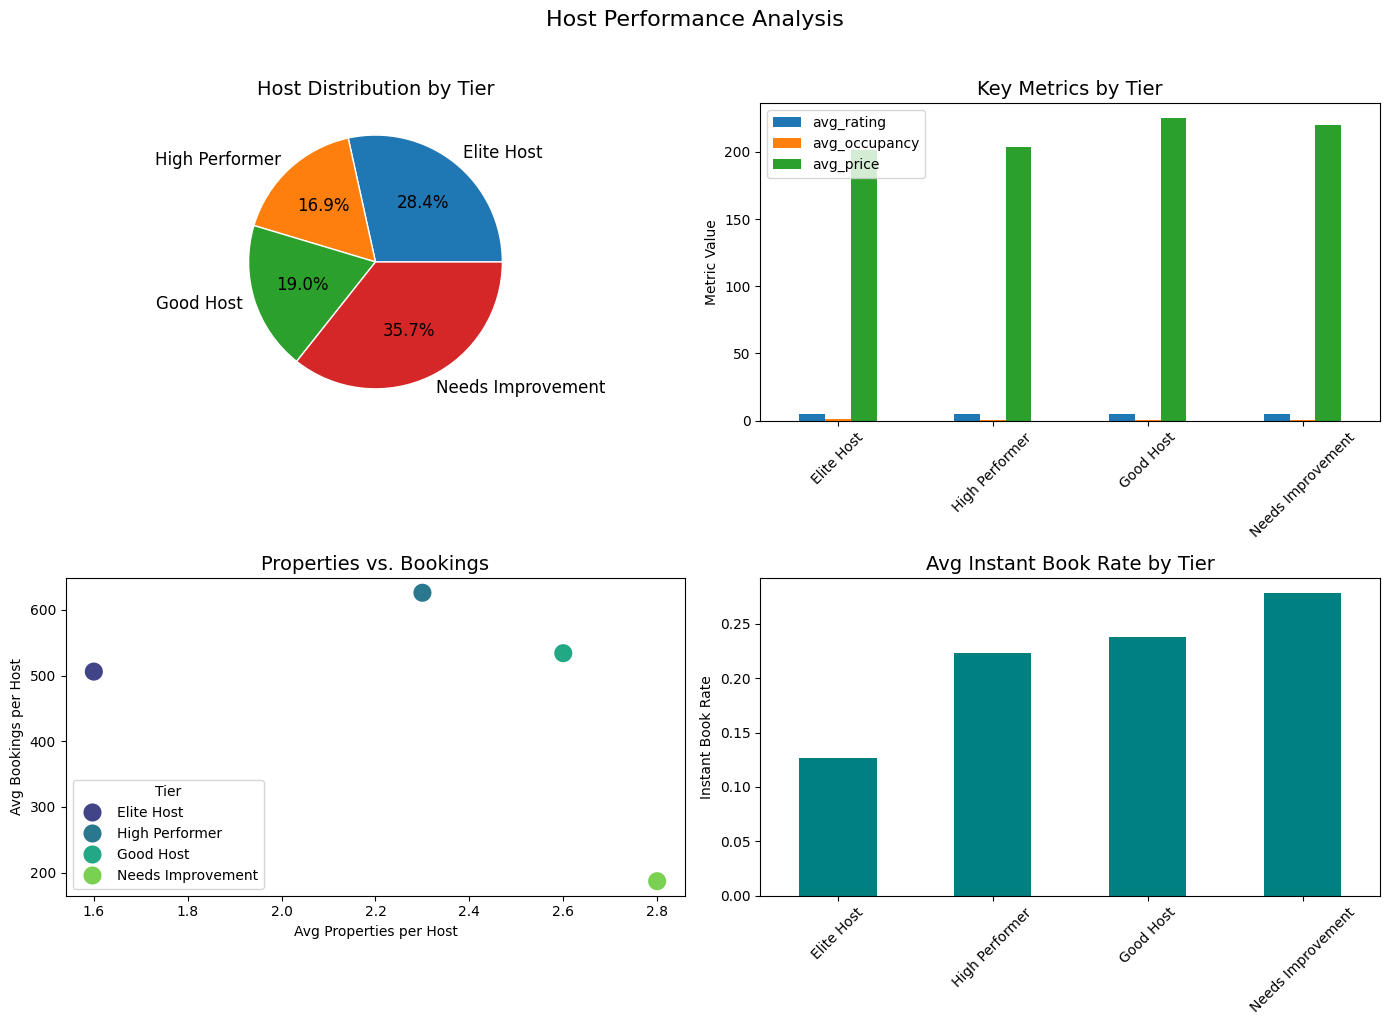

In [49]:
#3. How can we identify high-performing hosts and understand what drives superior guest satisfaction and booking rates?
query = (
    """
WITH host_performance AS (
    SELECT
        l.host_id,
        l.host_name,
        COUNT(DISTINCT l.id) AS total_properties,
        AVG(l.review_scores_rating) AS avg_rating,
        SUM(l.number_of_reviews) AS total_reviews,
        AVG(l.price) AS avg_price,
        AVG(CASE WHEN l.instant_bookable = 't' THEN 1 ELSE 0 END) AS instant_book_rate,
        AVG(CASE WHEN c.available = 'f' THEN 1 ELSE 0 END) AS occupancy_rate,
        COUNT(CASE WHEN c.available = 'f' THEN 1 END) AS total_bookings
    FROM
        listings AS l
        INNER JOIN calendar AS c ON l.id = c.listing_id
    WHERE
        l.host_id IS NOT NULL
    GROUP BY
        l.host_id,
        l.host_name
    HAVING
        SUM(l.number_of_reviews) >= 10
)
SELECT
    CASE
        WHEN avg_rating >= 4.8 AND occupancy_rate >= 0.7 THEN 'Elite Host'
        WHEN avg_rating >= 4.5 AND occupancy_rate >= 0.6 THEN 'High Performer'
        WHEN avg_rating >= 4.0 AND occupancy_rate >= 0.4 THEN 'Good Host'
        ELSE 'Needs Improvement'
    END AS performance_tier,
    COUNT(*) AS host_count,
    ROUND(AVG(total_properties)::numeric, 1) AS avg_properties,
    ROUND(AVG(avg_rating)::numeric, 2) AS avg_rating,
    ROUND(AVG(occupancy_rate)::numeric, 3) AS avg_occupancy,
    ROUND(AVG(avg_price)::numeric, 2) AS avg_price,
    ROUND(AVG(instant_book_rate)::numeric, 3) AS avg_instant_book_rate,
    ROUND(AVG(total_bookings)::numeric, 0) AS avg_bookings
FROM
    host_performance
GROUP BY
    performance_tier
ORDER BY
    avg_rating DESC;
"""
)
df = pd.read_sql_query(query, engine)
display(df)

# Load data
df = pd.read_sql(query, engine)
df = df.set_index('performance_tier')
tier_order = ['Elite Host', 'High Performer', 'Good Host', 'Needs Improvement']
df = df.reindex(tier_order)

# Visualization setup
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Host Performance Analysis', fontsize=16, y=1.02)

# Host distribution pie chart
df['host_count'].plot(
    kind='pie',
    ax=axes[0, 0],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 12}
)
axes[0, 0].set_ylabel('')
axes[0, 0].set_title('Host Distribution by Tier', fontsize=14)
axes[0, 0].set_aspect('equal')

# Key metrics bar chart
df[['avg_rating', 'avg_occupancy', 'avg_price']].plot(
    kind='bar',
    ax=axes[0, 1],
    rot=45
)
axes[0, 1].set_title('Key Metrics by Tier', fontsize=14)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Metric Value')
axes[0, 1].legend(loc='upper left', fontsize=10)  

# Properties vs Bookings scatter plot
sns.scatterplot(
    data=df.reset_index(),
    x='avg_properties',
    y='avg_bookings',
    hue='performance_tier',
    s=200,
    ax=axes[1, 0],
    palette='viridis'
)
axes[1, 0].set_title('Properties vs. Bookings', fontsize=14)
axes[1, 0].set_xlabel('Avg Properties per Host')
axes[1, 0].set_ylabel('Avg Bookings per Host')
axes[1, 0].legend(title='Tier', loc='best', fontsize=10) 
# Instant Book Rate bar chart
df['avg_instant_book_rate'].plot(
    kind='bar',
    ax=axes[1, 1],
    color='teal',
    rot=45
)
axes[1, 1].set_title('Avg Instant Book Rate by Tier', fontsize=14)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Instant Book Rate')

# Show all plots
plt.tight_layout()
plt.show()


,rating_category,review_volume_category,listing_count,avg_price,total_bookings,total_available_days,booking_rate_pct,avg_daily_revenue,median_price
0,Good,16-30 Reviews,144,319.56,24332,52560,46.29,147.94,206.5
1,Excellent,31-60 Reviews,233,246.07,47051,85045,55.32,136.14,190.0
2,Excellent,16-30 Reviews,202,250.83,38722,73730,52.52,131.73,211.5
3,Excellent,6-15 Reviews,310,258.99,55685,113150,49.21,127.46,208.0
4,Very Good,16-30 Reviews,287,239.93,50883,104755,48.57,116.54,222.0
5,Excellent,60+ Reviews,365,205.98,74097,133225,55.62,114.56,169.0
6,Excellent,1-5 Reviews,536,257.91,83594,195640,42.73,110.20,215.0
7,Good,31-60 Reviews,155,243.90,25473,56575,45.03,109.82,205.0
8,Very Good,31-60 Reviews,334,219.53,60153,121910,49.34,108.32,187.0
9,Very Good,6-15 Reviews,278,227.27,45323,101470,44.67,101.51,201.5


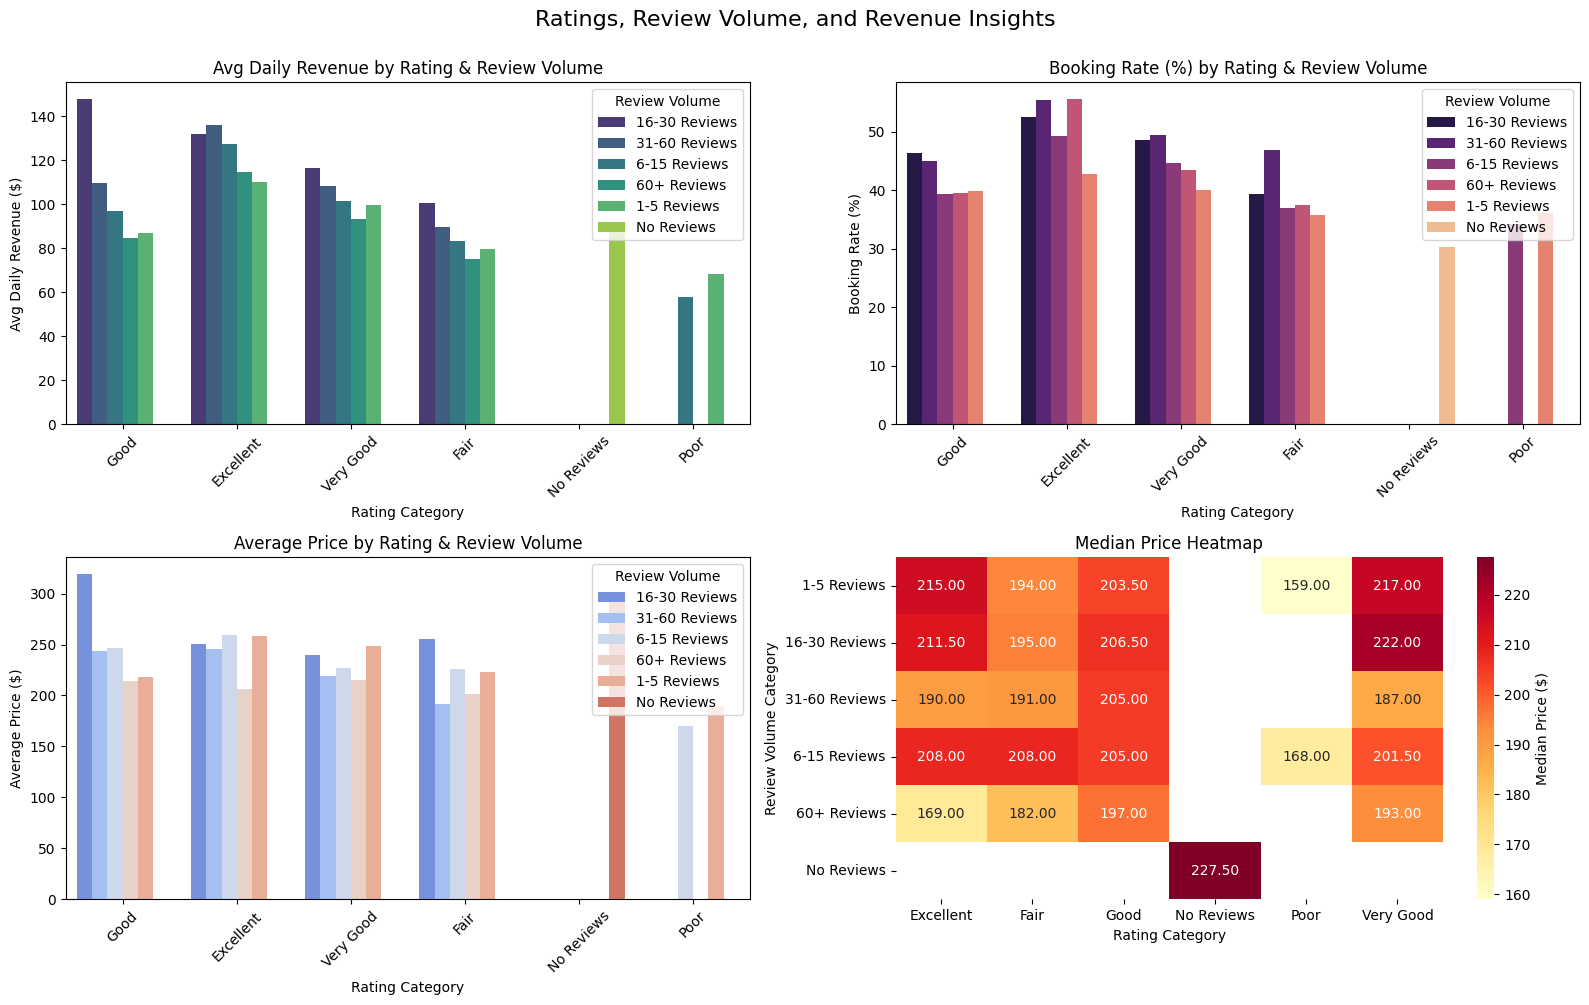

In [35]:
#4. How do review scores and review volume affect booking rates, and what's the minimum threshold for competitive performance?
query = (
    """
    SELECT
        CASE
            WHEN l.review_scores_rating IS NULL THEN 'No Reviews'
            WHEN l.review_scores_rating >= 4.9 THEN 'Excellent'
            WHEN l.review_scores_rating >= 4.7 THEN 'Very Good'
            WHEN l.review_scores_rating >= 4.5 THEN 'Good'
            WHEN l.review_scores_rating >= 4.0 THEN 'Fair'
            ELSE 'Poor'
        END AS rating_category,
        CASE
            WHEN l.number_of_reviews = 0 THEN 'No Reviews'
            WHEN l.number_of_reviews <= 5 THEN '1-5 Reviews'
            WHEN l.number_of_reviews <= 15 THEN '6-15 Reviews'
            WHEN l.number_of_reviews <= 30 THEN '16-30 Reviews'
            WHEN l.number_of_reviews <= 60 THEN '31-60 Reviews'
            ELSE '60+ Reviews'
        END AS review_volume_category,
        COUNT(DISTINCT l.id) AS listing_count,
        ROUND(AVG(l.price)::numeric, 2) AS avg_price,
        COUNT(CASE WHEN c.available = 'f' THEN 1 END) AS total_bookings,
        COUNT(*) AS total_available_days,
        ROUND(
            (COUNT(CASE WHEN c.available = 'f' THEN 1 END)::numeric / COUNT(*)::numeric) * 100,
            2
        ) AS booking_rate_pct,
        ROUND(
            AVG(l.price)::numeric * (COUNT(CASE WHEN c.available = 'f' THEN 1 END)::numeric / COUNT(*)::numeric),
            2
        ) AS avg_daily_revenue,
        percentile_cont(0.5) WITHIN GROUP (ORDER BY l.price) AS median_price
    FROM
        listings AS l
        INNER JOIN calendar AS c ON l.id = c.listing_id
    WHERE
        l.price IS NOT NULL
    GROUP BY
        rating_category,
        review_volume_category
    HAVING
        COUNT(DISTINCT l.id) >= 10
    ORDER BY
        avg_daily_revenue DESC;
    """
)

# Load data
df = pd.read_sql_query(query, engine)
display(df)

# Plotting setup
plt.figure(figsize=(16, 10))
plt.suptitle('Ratings, Review Volume, and Revenue Insights', fontsize=16, y=1)

# Avg Daily Revenue
plt.subplot(2, 2, 1)
sns.barplot(data=df, x='rating_category', y='avg_daily_revenue', hue='review_volume_category', palette='viridis')
plt.title('Avg Daily Revenue by Rating & Review Volume')
plt.ylabel('Avg Daily Revenue ($)')
plt.xlabel('Rating Category')
plt.xticks(rotation=45)
plt.legend(title='Review Volume')

# Booking Rate %
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='rating_category', y='booking_rate_pct', hue='review_volume_category', palette='magma')
plt.title('Booking Rate (%) by Rating & Review Volume')
plt.ylabel('Booking Rate (%)')
plt.xlabel('Rating Category')
plt.xticks(rotation=45)
plt.legend(title='Review Volume')

# Average Price
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='rating_category', y='avg_price', hue='review_volume_category', palette='coolwarm')
plt.title('Average Price by Rating & Review Volume')
plt.ylabel('Average Price ($)')
plt.xlabel('Rating Category')
plt.xticks(rotation=45)
plt.legend(title='Review Volume')

# Median Price Heatmap
plt.subplot(2, 2, 4)
heatmap_data = df.pivot(index='review_volume_category', columns='rating_category', values='median_price')
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label':'Median Price ($)'})
plt.title('Median Price Heatmap')
plt.xlabel('Rating Category')
plt.ylabel('Review Volume Category')

# Show plots
plt.tight_layout()
plt.show()


,pricing_tier,room_type,listing_count,avg_price,avg_occupancy_rate,avg_daily_revenue,min_price,max_price
0,Luxury (High Price),Entire home/apt,129,725.09,0.309,261.68,262.0,5916.0
1,Premium,Entire home/apt,163,348.74,0.383,129.94,203.0,612.0
2,Market Rate,Entire home/apt,1006,243.04,0.435,105.92,135.0,500.0
3,Budget (Low Price),Entire home/apt,681,179.76,0.463,81.05,77.0,337.0
4,Luxury (High Price),Private room,28,583.43,0.272,127.62,124.0,5804.0
5,Budget (Low Price),Private room,103,96.01,0.542,50.10,59.0,164.0
6,Premium,Private room,23,200.78,0.226,38.61,68.0,500.0
7,Market Rate,Private room,95,97.07,0.305,29.01,47.0,368.0


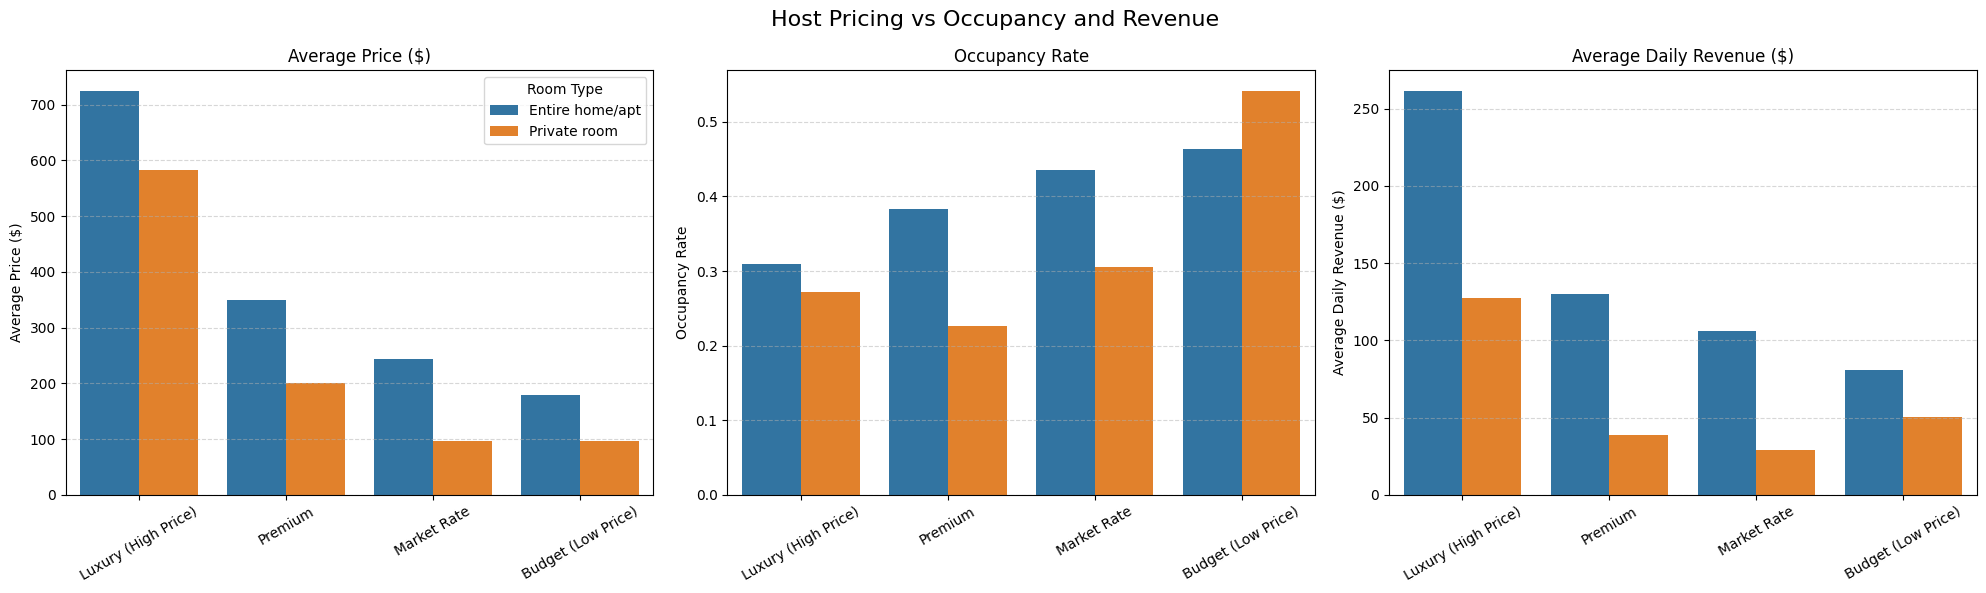

In [36]:
# 5. How should hosts price their properties relative to local competition, and what pricing strategies maximize both occupancy and revenue?
query = """
WITH market_stats AS (
    SELECT
        l.neighbourhood_cleansed,
        l.room_type,
        l.accommodates,
        AVG(l.price) AS avg_market_price,
        COUNT(*) AS market_size
    FROM listings l
    WHERE l.price IS NOT NULL
    GROUP BY
        l.neighbourhood_cleansed,
        l.room_type,
        l.accommodates
    HAVING COUNT(*) >= 20
),
pricing_analysis AS (
    SELECT
        l.id,
        l.neighbourhood_cleansed,
        l.room_type,
        l.accommodates,
        l.price,
        ms.avg_market_price,
        CASE
            WHEN l.price <= ms.avg_market_price * 0.8 THEN 'Budget (Low Price)'
            WHEN l.price <= ms.avg_market_price * 1.2 THEN 'Market Rate'
            WHEN l.price <= ms.avg_market_price * 1.5 THEN 'Premium'
            ELSE 'Luxury (High Price)'
        END AS pricing_tier
    FROM listings l
    INNER JOIN market_stats ms
        ON l.neighbourhood_cleansed = ms.neighbourhood_cleansed
        AND l.room_type = ms.room_type
        AND l.accommodates = ms.accommodates
    WHERE l.price IS NOT NULL
),
performance_metrics AS (
    SELECT
        pa.pricing_tier,
        pa.room_type,
        pa.id,
        pa.price,
        COUNT(CASE WHEN c.available = 'f' THEN 1 END) AS bookings,
        COUNT(*) AS total_days,
        ROUND(
            COUNT(CASE WHEN c.available = 'f' THEN 1 END)::DECIMAL / COUNT(*), 3
        ) AS occupancy_rate
    FROM pricing_analysis pa
    INNER JOIN calendar c
        ON pa.id = c.listing_id
    GROUP BY
        pa.pricing_tier,
        pa.room_type,
        pa.id,
        pa.price
)
SELECT
    pm.pricing_tier,
    pm.room_type,
    COUNT(*) AS listing_count,
    ROUND(AVG(pm.price)::NUMERIC, 2) AS avg_price,
    ROUND(AVG(pm.occupancy_rate)::NUMERIC, 3) AS avg_occupancy_rate,
    ROUND(AVG(pm.price * pm.occupancy_rate)::NUMERIC, 2) AS avg_daily_revenue,
    ROUND(MIN(pm.price)::NUMERIC, 2) AS min_price,
    ROUND(MAX(pm.price)::NUMERIC, 2) AS max_price
FROM performance_metrics pm
GROUP BY
    pm.pricing_tier,
    pm.room_type
ORDER BY
    pm.room_type,
    avg_daily_revenue DESC;
"""

# Load data from SQL
df = pd.read_sql(query, engine)
display(df)

# Set up figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
metrics = [
    ("avg_price", "Average Price ($)"),
    ("avg_occupancy_rate", "Occupancy Rate"),
    ("avg_daily_revenue", "Average Daily Revenue ($)")
]

# Plot each metric in its subplot
for idx, (metric, ylabel) in enumerate(metrics):
    ax = axes[idx]
    sns.barplot(
        data=df,
        x="pricing_tier",
        y=metric,
        hue="room_type",
        ax=ax
    )
    ax.set_title(ylabel)
    ax.set_xlabel("")
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=30)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    if idx == 0:
        ax.legend(title="Room Type")
    else:
        ax.get_legend().remove()

plt.suptitle("Host Pricing vs Occupancy and Revenue", fontsize=16)
plt.tight_layout()
plt.show()


,min_night_category,room_type,avg_min_nights,avg_nightly_price,avg_occupancy_rate,avg_daily_revenue,avg_minimum_booking_value,estimated_monthly_revenue,revenue_per_booking_period,listing_count
0,8-14 Nights,Entire home/apt,11.9,338.47,0.604,206.38,4140.45,6191.36,2537.61,55
1,4-7 Nights,Entire home/apt,5.7,338.97,0.608,205.22,2034.78,6156.71,1251.78,432
2,2 Nights,Entire home/apt,2.0,251.50,0.513,129.09,503.01,3872.67,258.18,1279
3,3 Nights,Entire home/apt,3.0,300.51,0.428,114.34,901.53,3430.30,343.03,534
4,15-30 Nights,Entire home/apt,25.9,294.73,0.410,106.94,7704.56,3208.24,2682.85,95
5,1 Night,Entire home/apt,1.0,268.80,0.363,90.58,268.80,2717.45,90.58,1469
6,30+ Nights,Entire home/apt,101.2,286.33,0.313,84.22,27845.35,2526.55,6998.97,40
7,3 Nights,Hotel room,3.0,147.00,0.597,87.80,441.00,2633.92,263.39,1
8,1 Night,Hotel room,1.0,370.00,0.182,87.07,370.00,2611.97,87.07,5
9,8-14 Nights,Private room,12.7,110.58,0.574,66.60,1384.50,1997.98,835.44,12


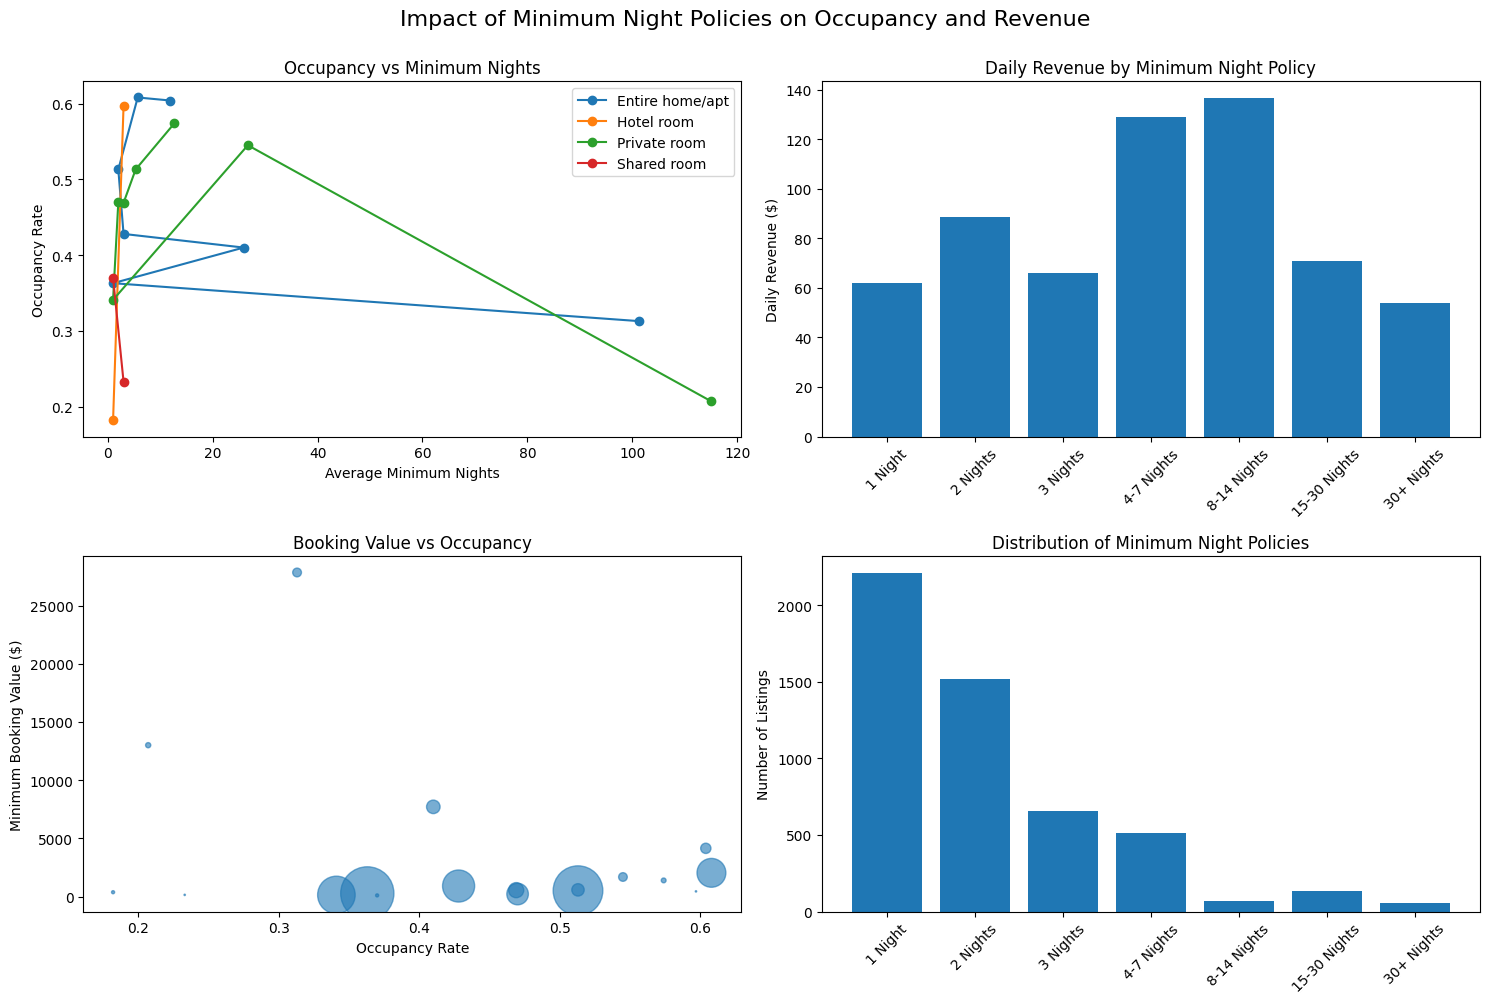

In [37]:
#6.  How do different minimum night requirements affect booking rates and revenue, and what's the optimal policy for different property types?
query = """
WITH policy_impact AS (
    SELECT
        l.id,
        l.room_type,
        l.neighbourhood_cleansed,
        l.price,
        CASE
            WHEN l.minimum_nights = 1 THEN '1 Night'
            WHEN l.minimum_nights = 2 THEN '2 Nights'
            WHEN l.minimum_nights = 3 THEN '3 Nights'
            WHEN l.minimum_nights BETWEEN 4 AND 7 THEN '4-7 Nights'
            WHEN l.minimum_nights BETWEEN 8 AND 14 THEN '8-14 Nights'
            WHEN l.minimum_nights BETWEEN 15 AND 30 THEN '15-30 Nights'
            ELSE '30+ Nights'
        END AS min_night_category,
        l.minimum_nights,
        COUNT(CASE WHEN c.available = 'f' THEN 1 END) AS bookings,
        COUNT(*) AS total_days,
        AVG(CASE WHEN c.available = 'f' THEN 1.0 ELSE 0.0 END) AS occupancy_rate
    FROM
        listings AS l
        INNER JOIN calendar AS c ON l.id = c.listing_id
    WHERE
        l.price IS NOT NULL
        AND l.minimum_nights IS NOT NULL
    GROUP BY
        l.id,
        l.room_type,
        l.neighbourhood_cleansed,
        l.price,
        l.minimum_nights
)
SELECT
    min_night_category,
    room_type,
    ROUND(AVG(minimum_nights)::numeric, 1) AS avg_min_nights,
    ROUND(AVG(price)::numeric, 2) AS avg_nightly_price,
    ROUND(AVG(occupancy_rate)::numeric, 3) AS avg_occupancy_rate,
    ROUND(AVG(price * occupancy_rate)::numeric, 2) AS avg_daily_revenue,
    ROUND(AVG(price * minimum_nights)::numeric, 2) AS avg_minimum_booking_value,
    ROUND(AVG(price * occupancy_rate * 30)::numeric, 2) AS estimated_monthly_revenue,
    ROUND(AVG(price * occupancy_rate * minimum_nights)::numeric, 2) AS revenue_per_booking_period,
    COUNT(*) AS listing_count
FROM
    policy_impact
GROUP BY
    min_night_category,
    room_type
ORDER BY
    room_type,
    avg_daily_revenue DESC;
"""
# Load data from SQL
df = pd.read_sql_query(query, engine)
display(df)

# Define the order of minimum night categories
categories = ['1 Night', '2 Nights', '3 Nights', '4-7 Nights', 
              '8-14 Nights', '15-30 Nights', '30+ Nights']

# Set up figure
plt.figure(figsize=(15, 10))
plt.suptitle('Impact of Minimum Night Policies on Occupancy and Revenue', fontsize=16, y=1)

# Occupancy by minimum nights
plt.subplot(2, 2, 1)
for room_type in df['room_type'].unique():
    data = df[df['room_type'] == room_type]
    plt.plot(data['avg_min_nights'], data['avg_occupancy_rate'], marker='o', label=room_type)
plt.xlabel('Average Minimum Nights')
plt.ylabel('Occupancy Rate')
plt.title('Occupancy vs Minimum Nights')
plt.legend()

# Daily Revenue by Minimum Night Policy
plt.subplot(2, 2, 2)
daily_rev = df.groupby('min_night_category')['avg_daily_revenue'].mean().reindex(categories)
plt.bar(categories, daily_rev)
plt.xticks(rotation=45)
plt.ylabel('Daily Revenue ($)')
plt.title('Daily Revenue by Minimum Night Policy')

# Booking value vs Occupancy
plt.subplot(2, 2, 3)
plt.scatter(df['avg_occupancy_rate'], df['avg_minimum_booking_value'], s=df['listing_count'], alpha=0.6)
plt.xlabel('Occupancy Rate')
plt.ylabel('Minimum Booking Value ($)')
plt.title('Booking Value vs Occupancy')

# Distribution of Minimum Night Policies
plt.subplot(2, 2, 4)
policy_counts = df.groupby('min_night_category')['listing_count'].sum().reindex(categories)
plt.bar(range(len(categories)), policy_counts)
plt.xticks(range(len(categories)), categories, rotation=45)
plt.ylabel('Number of Listings')
plt.title('Distribution of Minimum Night Policies')

plt.tight_layout()
plt.show()

,market_classification,neighborhood_count,avg_listings,avg_unique_hosts,avg_listings_per_host,avg_price,avg_market_occupancy_rate,avg_revenue_per_listing_day,avg_supply_rank,avg_demand_rank
0,High Demand,9,72.22,44.67,1.77,255.65,0.43,110.08,14.67,57.67
1,Oversaturated,10,248.40,103.00,2.69,250.91,0.41,104.47,5.80,63.40
2,Emerging Market,64,17.80,13.72,1.36,201.75,0.47,94.97,70.50,46.59
3,Growth Opportunity,19,37.95,24.58,1.57,215.90,0.43,93.24,29.00,58.84


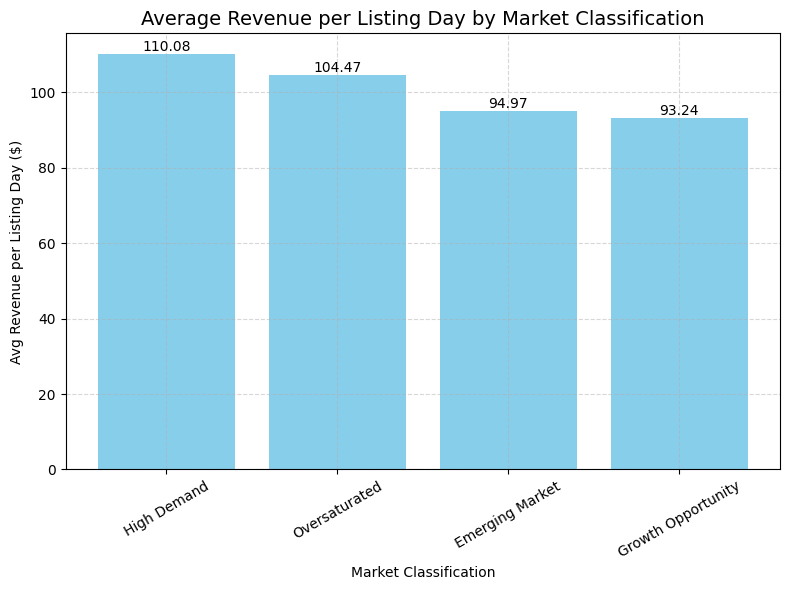

In [38]:
#7. Which neighborhoods are oversaturated with listings, and where are the best opportunities for new hosts to enter the market?
query = (
    """
    WITH market_metrics AS (
        SELECT
            l.neighbourhood_cleansed,
            COUNT(DISTINCT l.id) AS total_listings,
            COUNT(DISTINCT l.host_id) AS unique_hosts,
            ROUND(COUNT(DISTINCT l.id)::DECIMAL / NULLIF(COUNT(DISTINCT l.host_id), 0), 2) AS listings_per_host,
            ROUND(AVG(l.price)::NUMERIC, 2) AS avg_price,
            COUNT(CASE WHEN c.available = 'f' THEN 1 END) AS total_bookings,
            COUNT(*) AS total_capacity,
            ROUND(COUNT(CASE WHEN c.available = 'f' THEN 1 END)::DECIMAL / NULLIF(COUNT(*), 0), 2) AS market_occupancy_rate
        FROM listings AS l
        INNER JOIN calendar AS c ON l.id = c.listing_id
        WHERE l.price IS NOT NULL
        GROUP BY l.neighbourhood_cleansed
    ),
    competition_analysis AS (
        SELECT
            *,
            ROUND(avg_price * market_occupancy_rate, 2) AS revenue_per_listing_day,
            CASE
                WHEN total_listings >= 100 AND market_occupancy_rate < 0.5 THEN 'Oversaturated'
                WHEN total_listings >= 50 AND market_occupancy_rate < 0.7 THEN 'High Demand'
                WHEN total_listings >= 30 AND market_occupancy_rate < 0.6 THEN 'Growth Opportunity'
                WHEN total_listings BETWEEN 30 AND 99 AND market_occupancy_rate BETWEEN 0.5 AND 0.7 THEN 'Balanced Market'
                ELSE 'Emerging Market'
            END AS market_classification,
            ROW_NUMBER() OVER (ORDER BY total_listings DESC) AS supply_rank,
            ROW_NUMBER() OVER (ORDER BY market_occupancy_rate DESC) AS demand_rank
        FROM market_metrics
        WHERE total_listings >= 10
    )
    SELECT
        market_classification,
        COUNT(*) AS neighborhood_count,
        ROUND(AVG(total_listings)::NUMERIC, 2) AS avg_listings,
        ROUND(AVG(unique_hosts)::NUMERIC, 2) AS avg_unique_hosts,
        ROUND(AVG(listings_per_host)::NUMERIC, 2) AS avg_listings_per_host,
        ROUND(AVG(avg_price)::NUMERIC, 2) AS avg_price,
        ROUND(AVG(market_occupancy_rate)::NUMERIC, 2) AS avg_market_occupancy_rate,
        ROUND(AVG(revenue_per_listing_day)::NUMERIC, 2) AS avg_revenue_per_listing_day,
        ROUND(AVG(supply_rank)::NUMERIC, 2) AS avg_supply_rank,
        ROUND(AVG(demand_rank)::NUMERIC, 2) AS avg_demand_rank
    FROM competition_analysis
    GROUP BY market_classification
    ORDER BY avg_revenue_per_listing_day DESC;
    """
)
# Load data from SQL
df = pd.read_sql_query(query, engine)
display(df)

# Plot bar chart for revenue per listing day by market classification
plt.figure(figsize=(8, 6))
bars = plt.bar(df['market_classification'], df['avg_revenue_per_listing_day'], color='skyblue')

plt.title('Average Revenue per Listing Day by Market Classification', fontsize=14)
plt.xlabel('Market Classification')
plt.ylabel('Avg Revenue per Listing Day ($)')
plt.xticks(rotation=30)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.grid(axis='x', alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()

,accommodates,room_type,listing_count,avg_price,price_per_guest,min_price,max_price,total_bookings,total_available_days,occupancy_rate,avg_daily_revenue,revenue_per_guest_capacity,avg_rating
0,1,Private room,332,90.78,90.78,36.0,2000.0,51716,121180,0.427,38.74,38.74,3.93
1,2,Entire home/apt,1172,203.24,101.62,65.0,5808.0,189511,427780,0.443,90.04,45.02,4.32
2,2,Private room,808,128.03,64.01,36.0,5804.0,115148,294920,0.390,49.99,24.99,3.91
3,3,Entire home/apt,286,193.21,64.40,85.0,455.0,53474,104390,0.512,98.97,32.99,4.35
4,3,Private room,35,153.83,51.28,58.0,436.0,4863,12775,0.381,58.56,19.52,4.03
5,4,Entire home/apt,1210,260.27,65.07,77.0,5916.0,195977,441650,0.444,115.49,28.87,4.35
6,4,Private room,39,368.92,92.23,64.0,5841.0,3501,14235,0.246,90.73,22.68,2.99
7,5,Entire home/apt,226,276.93,55.39,123.0,900.0,36715,82490,0.445,123.26,24.65,4.37
8,6,Entire home/apt,518,354.74,59.12,16.0,3000.0,79470,189070,0.420,149.10,24.85,4.26
9,7,Entire home/apt,82,363.43,51.92,126.0,1695.0,15844,29930,0.529,192.39,27.48,4.33


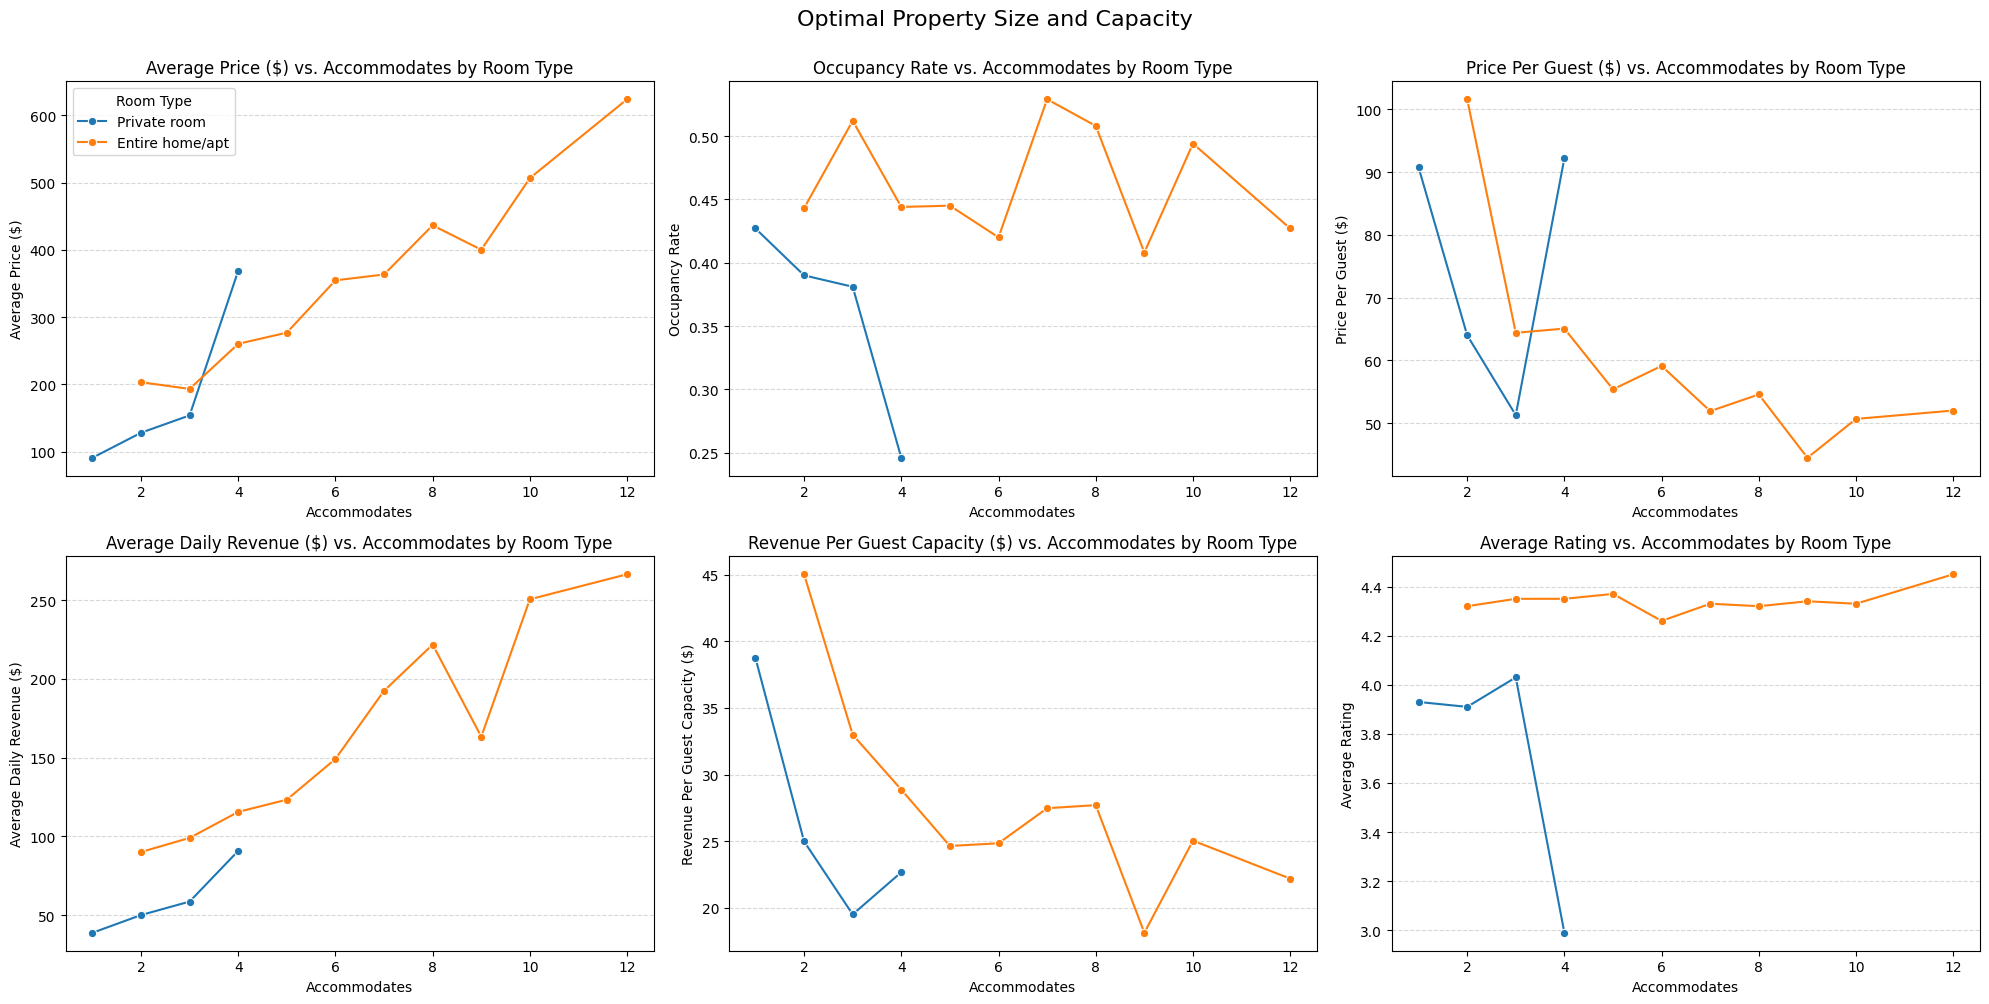

In [51]:
#8. How does property size (accommodates) affect pricing power and booking performance, and what's the optimal capacity for different markets?
query = (
    """
    SELECT
        l.accommodates,
        l.room_type,
        COUNT(DISTINCT l.id) AS listing_count,
        ROUND(AVG(l.price)::numeric, 2) AS avg_price,
        ROUND(AVG(l.price)::numeric / NULLIF(l.accommodates, 0), 2) AS price_per_guest,
        MIN(l.price) AS min_price,
        MAX(l.price) AS max_price,
        COUNT(CASE WHEN c.available = 'f' THEN 1 END) AS total_bookings,
        COUNT(*) AS total_available_days,
        ROUND(
            COUNT(CASE WHEN c.available = 'f' THEN 1 END)::numeric / NULLIF(COUNT(*), 0),
            3
        ) AS occupancy_rate,
        ROUND(
            AVG(l.price)::numeric * COUNT(CASE WHEN c.available = 'f' THEN 1 END)::numeric / NULLIF(COUNT(*), 0),
            2
        ) AS avg_daily_revenue,
        ROUND(
            (
                AVG(l.price)::numeric * COUNT(CASE WHEN c.available = 'f' THEN 1 END)::numeric / NULLIF(COUNT(*), 0)
            ) / NULLIF(l.accommodates, 0),
            2
        ) AS revenue_per_guest_capacity,
        ROUND(AVG(COALESCE(l.review_scores_rating, 0))::numeric, 2) AS avg_rating
    FROM
        listings l
        JOIN calendar c ON l.id = c.listing_id
    WHERE
        l.price IS NOT NULL
        AND l.accommodates IS NOT NULL
        AND l.accommodates BETWEEN 1 AND 16
    GROUP BY
        l.accommodates,
        l.room_type
    HAVING
        COUNT(DISTINCT l.id) >= 20
    ORDER BY
        l.accommodates,
        l.room_type;
    """
)
# Load data from SQL
df = pd.read_sql_query(query, engine)
display(df)

# Define metrics and labels for plotting
metrics = [
    ("avg_price", "Average Price ($)"),
    ("occupancy_rate", "Occupancy Rate"),
    ("price_per_guest", "Price Per Guest ($)"),
    ("avg_daily_revenue", "Average Daily Revenue ($)"),
    ("revenue_per_guest_capacity", "Revenue Per Guest Capacity ($)"),
    ("avg_rating", "Average Rating"),
]

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.suptitle('Optimal Property Size and Capacity', fontsize = 16, y =1)
axes = axes.flatten()

# Plot each metric
for idx, (metric, ylabel) in enumerate(metrics):
    ax = axes[idx]
    sns.lineplot(
        data=df,
        x="accommodates",
        y=metric,
        hue="room_type",
        marker="o",
        ax=ax
    )
    ax.set_title(f"{ylabel} vs. Accommodates by Room Type")
    ax.set_xlabel("Accommodates")
    ax.set_ylabel(ylabel)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    if idx == 0:
        ax.legend(title="Room Type")
    else:
        ax.get_legend().remove()

# Final layout and show plot
plt.tight_layout()
plt.show()


,day_type,room_type,unique_listings,total_opportunities,total_bookings,booking_rate,avg_price,avg_daily_revenue,booking_rank,revenue_rank
0,Weekday,Entire home/apt,3904,1018944,458691,0.4502,277.03,120.53,2,2
1,Weekend,Entire home/apt,3904,406016,185365,0.4565,277.03,122.53,1,1
2,Weekday,Hotel room,6,1566,378,0.2414,332.83,82.78,2,2
3,Weekend,Hotel room,6,624,172,0.2756,332.83,98.24,1,1
4,Weekday,Private room,1236,322596,128167,0.3973,129.30,43.34,1,1
5,Weekend,Private room,1236,128544,50771,0.3950,129.30,43.15,2,2
6,Weekday,Shared room,6,1566,547,0.3493,88.17,27.23,1,2
7,Weekend,Shared room,6,624,213,0.3413,88.17,27.29,2,1


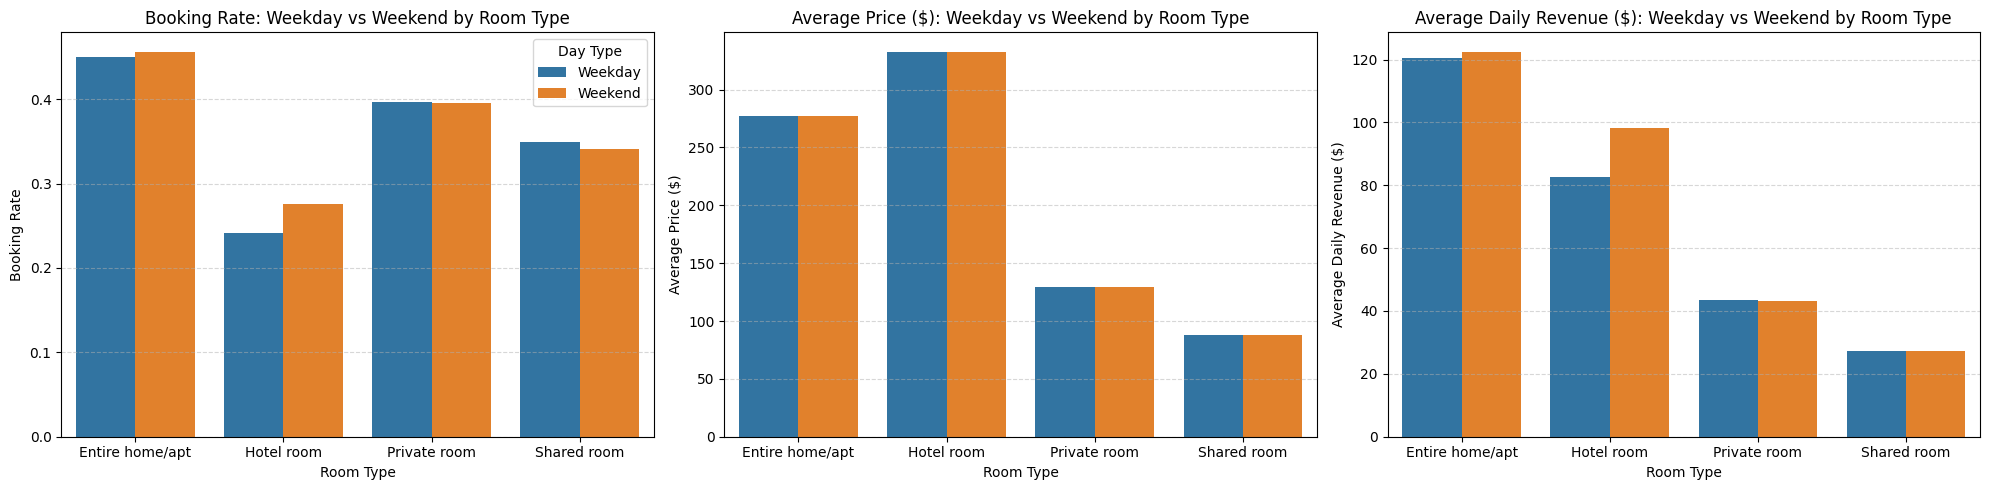

In [40]:
# 9. How do booking patterns and pricing differ between weekdays and weekends, and how should hosts optimize their strategies accordingly?
query = (
    """
    WITH daily_patterns AS (
        SELECT
            l.id,
            l.room_type,
            l.neighbourhood_cleansed,
            l.price,
            c.date,
            c.available,
            CASE
                WHEN EXTRACT(DOW FROM c.date::date) IN (0, 6) THEN 'Weekend'
                ELSE 'Weekday'
            END AS day_type,
            CASE
                WHEN c.available = 'f' THEN 1
                ELSE 0
            END AS is_booked
        FROM listings AS l
        INNER JOIN calendar AS c
            ON l.id = c.listing_id
        WHERE l.price IS NOT NULL
    ),
    performance_by_day_type AS (
        SELECT
            day_type,
            room_type,
            COUNT(*) AS total_opportunities,
            SUM(is_booked) AS total_bookings,
            ROUND(AVG(is_booked)::numeric, 4) AS booking_rate,
            ROUND(AVG(price)::numeric, 2) AS avg_price,
            COUNT(DISTINCT id) AS unique_listings,
            ROUND(AVG(price * is_booked)::numeric, 2) AS avg_daily_revenue
        FROM daily_patterns
        GROUP BY day_type, room_type
    ),
    comparative_analysis AS (
        SELECT
            *,
            RANK() OVER (PARTITION BY room_type ORDER BY booking_rate DESC) AS booking_rank,
            RANK() OVER (PARTITION BY room_type ORDER BY avg_daily_revenue DESC) AS revenue_rank
        FROM performance_by_day_type
    )
    SELECT
        day_type,
        room_type,
        unique_listings,
        total_opportunities,
        total_bookings,
        booking_rate,
        avg_price,
        avg_daily_revenue,
        booking_rank,
        revenue_rank
    FROM comparative_analysis
    ORDER BY room_type, day_type;
    """
)

# Data Extraction
df = pd.read_sql_query(query, engine)
display(df)

# Metrics to Plot
metrics = [
    ("booking_rate", "Booking Rate"),
    ("avg_price", "Average Price ($)"),
    ("avg_daily_revenue", "Average Daily Revenue ($)")
]

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()

for idx, (metric, ylabel) in enumerate(metrics):
    ax = axes[idx]
    sns.barplot(
        data=df,
        x="room_type",
        y=metric,
        hue="day_type",
        ax=ax
    )
    ax.set_title(f"{ylabel}: Weekday vs Weekend by Room Type")
    ax.set_xlabel("Room Type")
    ax.set_ylabel(ylabel)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    if idx == 0:
        ax.legend(title="Day Type")
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()


,lead_time_bucket,room_type,unique_listings,total_opportunities,bookings,booking_rate,avg_price,booking_rate_rank,total_bookings_rank
0,180+ days,Entire home/apt,3904,542656,288331,0.5313,277.03,1,1
1,91-180 days,Entire home/apt,3904,351360,145843,0.4151,277.03,2,2
2,61-90 days,Entire home/apt,3904,117120,45400,0.3876,277.03,3,4
3,8-30 days,Entire home/apt,3904,89792,29366,0.3270,277.03,4,7
4,0-7 days,Entire home/apt,3904,31232,10031,0.3212,277.03,5,10
5,31-60 days,Entire home/apt,3904,117120,35265,0.3011,277.03,6,6
6,180+ days,Hotel room,6,834,324,0.3885,332.83,1,14
7,61-90 days,Hotel room,6,180,35,0.1944,332.83,2,20
8,0-7 days,Hotel room,6,48,9,0.1875,332.83,3,24
9,8-30 days,Hotel room,6,138,23,0.1667,332.83,4,21


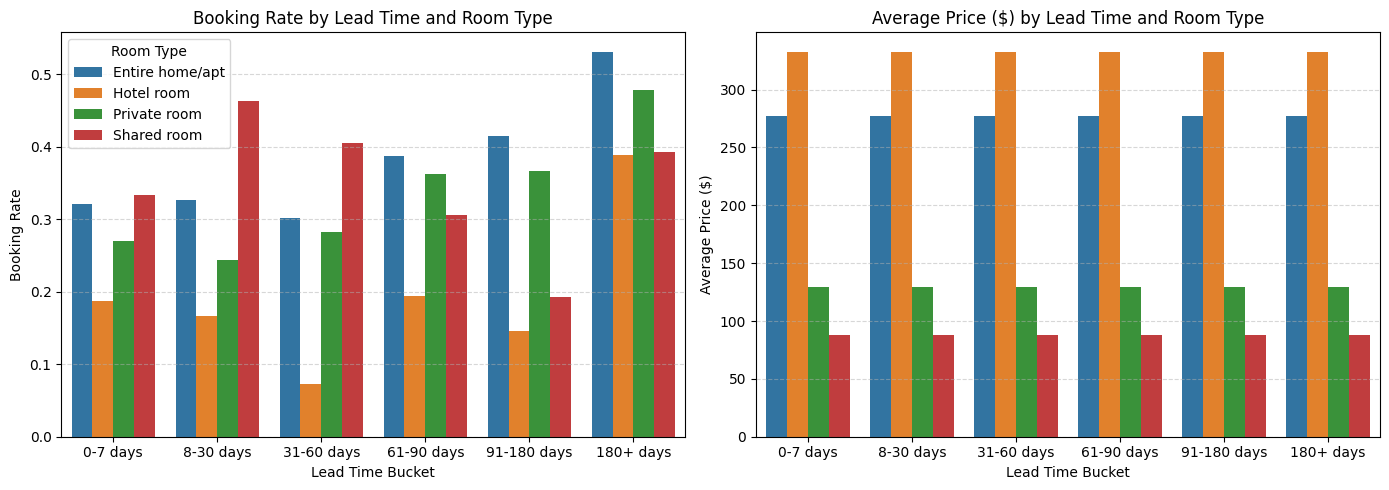

In [41]:
# 10. How far in advance do bookings occur, and how should hosts manage their availability calendar for optimal performance?
query = """
SELECT
    CASE
        WHEN (c.date::date - CURRENT_DATE) <= 7 THEN '0-7 days'
        WHEN (c.date::date - CURRENT_DATE) <= 30 THEN '8-30 days'
        WHEN (c.date::date - CURRENT_DATE) <= 60 THEN '31-60 days'
        WHEN (c.date::date - CURRENT_DATE) <= 90 THEN '61-90 days'
        WHEN (c.date::date - CURRENT_DATE) <= 180 THEN '91-180 days'
        ELSE '180+ days'
    END AS lead_time_bucket,
    l.room_type,
    COUNT(DISTINCT l.id) AS unique_listings,
    COUNT(*) AS total_opportunities,
    SUM(CASE WHEN c.available = 'f' THEN 1 ELSE 0 END) AS bookings,
    ROUND(AVG(CASE WHEN c.available = 'f' THEN 1 ELSE 0 END)::numeric, 4) AS booking_rate,
    ROUND(AVG(l.price)::numeric, 2) AS avg_price,
    RANK() OVER (
        PARTITION BY l.room_type
        ORDER BY AVG(CASE WHEN c.available = 'f' THEN 1 ELSE 0 END) DESC
    ) AS booking_rate_rank,
    DENSE_RANK() OVER (
        ORDER BY SUM(CASE WHEN c.available = 'f' THEN 1 ELSE 0 END) DESC
    ) AS total_bookings_rank
FROM
    listings AS l
    INNER JOIN calendar AS c ON l.id = c.listing_id
WHERE
    l.price IS NOT NULL
    AND c.date::date >= CURRENT_DATE
    AND c.date::date <= CURRENT_DATE + INTERVAL '365 days'
GROUP BY
    lead_time_bucket,
    l.room_type
ORDER BY
    l.room_type,
    booking_rate_rank;
"""

#Data Extraction: Run query and load results into DataFrame
df = pd.read_sql_query(query, engine)
display(df)

#Data Preparation: Set categorical order for lead time buckets
bucket_order = ['0-7 days', '8-30 days', '31-60 days', '61-90 days', '91-180 days', '180+ days']
df['lead_time_bucket'] = pd.Categorical(df['lead_time_bucket'], categories=bucket_order, ordered=True)

#Visualization Setup: Define metrics to plot
metrics = [
    ("booking_rate", "Booking Rate"),
    ("avg_price", "Average Price ($)")
]

#Visualization: Plot metrics by lead time and room type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.flatten()

for idx, (metric, ylabel) in enumerate(metrics):
    ax = axes[idx]
    plot_df = df.dropna(subset=[metric])
    sns.barplot(
        data=plot_df,
        x="lead_time_bucket",
        y=metric,
        hue="room_type",
        ax=ax
    )
    ax.set_title(f"{ylabel} by Lead Time and Room Type")
    ax.set_xlabel("Lead Time Bucket")
    ax.set_ylabel(ylabel)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    if idx == 0:
        ax.legend(title="Room Type")
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

In [42]:
#11. How are Airbnb listings distributed geographically in the city, and how do price and room type vary by location?
listings = pd.read_sql_query("""
    SELECT 
        id, 
        name, 
        neighbourhood_cleansed, 
        room_type, 
        price, 
        latitude, 
        longitude, 
        accommodates
    FROM 
        listings
    WHERE 
        latitude IS NOT NULL 
        AND longitude IS NOT NULL 
        AND price IS NOT NULL
    LIMIT 500;
""", engine)

# Calculate map center
center_lat = listings['latitude'].mean()
center_lng = listings['longitude'].mean()

# Create map
m = folium.Map(location=[center_lat, center_lng], zoom_start=11)

# Create MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for _, row in listings.iterrows():
    # Set marker color and icon based on room type
    if row['room_type'] == 'Entire home/apt':
        color = 'red'
        icon = 'home'
    elif row['room_type'] == 'Private room':
        color = 'blue'
        icon = 'bed'
    else:
        color = 'green'
        icon = 'users'
    
    # Create popup text
    popup_text = f"{row['name'][:30]}...\nNeighbourhood: {row['neighbourhood_cleansed']}\n" \
                 f"Room type: {row['room_type']}\nPrice: ${row['price']}\nGuests: {row['accommodates']}"
    
    # Add marker to cluster
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        icon=folium.Icon(color=color, icon=icon, prefix='fa')
    ).add_to(marker_cluster)

# Save map as HTML
m.save("airbnb_listings_map.html")
